In [28]:
import pandas as pd
import json
import os
import wandb
import seaborn as sns
%matplotlib notebook

# Instance Model Results

In [15]:
model_dir = f"{os.environ['MINERVA_HOME']}/models/minerva_instance_models"

instance_model_res = {}
for split in ["val", "test"]:
    with open(f"{model_dir}/{split}_results.json") as f:
        instance_model_res[split] = json.load(f)
df = pd.DataFrame.from_dict(instance_model_res)

for row in df.itertuples():
    print(f"{row.Index.replace('eval_', '').capitalize()} & {row.val:.2} & {row.test:.2} \\\\")

# MIL Sweep

Load training experiments from Wandb API

In [25]:
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("aadelucia/Minerva", filters = {"group": "MIL-Min10-v2"})

summary_list, config_list, name_list = [], [], []
data = []
for run in runs: 
    row = {}
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    row.update({k:v for k,v in run.summary._json_dict.items()})
    
    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    row.update({k: v for k,v in run.config.items() if not k.startswith('_')})
    
    # .name is the human-readable name of the run.
    row["name"] = run.name
    
    # Add 
    data.append(row)

runs_df = pd.DataFrame(data)

,gradients/instance_model.model.roberta.encoder.layer.6.intermediate.dense.weight,gradients/instance_model.model.roberta.encoder.layer.10.attention.self.key.bias,gradients/instance_model.model.roberta.encoder.layer.5.attention.output.LayerNorm.weight,gradients/instance_model.model.roberta.encoder.layer.3.attention.output.dense.weight,gradients/instance_model.model.roberta.encoder.layer.5.intermediate.dense.weight,gradients/instance_model.model.roberta.encoder.layer.9.output.LayerNorm.weight,gradients/instance_model.model.roberta.encoder.layer.8.output.LayerNorm.weight,gradients/instance_model.model.roberta.encoder.layer.1.intermediate.dense.weight,gradients/instance_model.model.roberta.encoder.layer.8.attention.output.LayerNorm.weight,gradients/instance_model.model.roberta.encoder.layer.8.intermediate.dense.weight,...,use_legacy_prediction_loop,gradient_accumulation_steps,per_device_train_batch_size,name,train/total_flos,train/train_runtime,train/train_samples_per_second,train/train_loss,train/train_steps_per_second,_wandb
0,"{'_type': 'histogram', 'bins': [-0.06086652725...","{'bins': [-4.0745362639427185e-10, -3.97449184...","{'_type': 'histogram', 'bins': [-0.01289225555...","{'bins': [-0.025412380695343018, -0.0247671026...","{'values': [1, 0, 0, 0, 1, 1, 1, 0, 4, 0, 1, 1...","{'_type': 'histogram', 'bins': [-0.03970760479...","{'_type': 'histogram', 'bins': [-0.01946268603...","{'values': [1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2...","{'_type': 'histogram', 'bins': [-0.01017470285...","{'_type': 'histogram', 'bins': [-0.01390092261...",...,False,1,5,finetune-0.1,NaN,NaN,NaN,NaN,NaN,NaN
1,"{'_type': 'histogram', 'bins': [-0.06135215610...","{'_type': 'histogram', 'bins': [-1.16415321826...","{'bins': [-0.025415947660803795, -0.0242793392...","{'_type': 'histogram', 'bins': [-0.02745212614...","{'bins': [-0.06848344951868057, -0.06613311916...","{'_type': 'histogram', 'bins': [-0.06411485373...","{'_type': 'histogram', 'bins': [-0.12419356405...","{'_type': 'histogram', 'bins': [-0.16924174129...","{'_type': 'histogram', 'values': [1, 0, 0, 1, ...","{'_type': 'histogram', 'bins': [-0.05119511485...",...,False,1,5,finetune-0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"{'_type': 'histogram', 'bins': [-0.07093815505...","{'_type': 'histogram', 'bins': [-3.63797880709...","{'values': [1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0...","{'_type': 'histogram', 'bins': [-0.01783340796...","{'bins': [-0.09497564285993576, -0.09226739406...","{'bins': [-0.01633741520345211, -0.01303921174...","{'values': [1, 0, 0, 0, 3, 56, 665, 27, 5, 2, ...","{'bins': [-0.0511045977473259, -0.049221150577...","{'_type': 'histogram', 'bins': [-0.00799350440...","{'_type': 'histogram', 'bins': [-0.03243221342...",...,False,1,5,finetune-0.7,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'bins': [-0.028410058468580246, -0.0270912572...","{'bins': [-3.4924596548080444e-10, -3.38332029...","{'values': [1, 0, 1, 1, 0, 1, 2, 4, 4, 1, 5, 5...","{'_type': 'histogram', 'bins': [-0.01875911280...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","{'_type': 'histogram', 'bins': [-0.01161115244...","{'_type': 'histogram', 'bins': [-0.08656097948...","{'bins': [-0.09185443818569183, -0.08947475254...","{'_type': 'histogram', 'bins': [-0.00283521041...","{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",...,False,1,5,finetune-1.0,0.0,56539.2062,33.664,0.475687,1.683,{'runtime': 58787}
4,"{'_type': 'histogram', 'bins': [-0.06412033736...","{'_type': 'histogram', 'values': [1, 1, 0, 0, ...","{'_type': 'histogram', 'bins': [-0.01023471169...","{'_type': 'histogram', 'bins': [-0.01380565203...","{'values': [1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2...","{'_type': 'histogram', 'bins': [-0.04939265549...","{'_type': 'histogram', 'bins': [-0.01718818955...","{'_type': 'histogram', 'bins': [-0.03849432617...","{'_type': 'histogram', 'bins': [-0.00708227325...","{'_type': 'histogram', 'bins': [-0.02032580226...",...,False,1,5,finetune-0.3,0.0,43271.2257,43.987,0.438139,2.199,{'runtime': 45455}
5,"{'bins': [-0.0790951326489448

In [27]:
runs_df.columns.tolist()

['gradients/instance_model.model.roberta.encoder.layer.6.intermediate.dense.weight',
 'gradients/instance_model.model.roberta.encoder.layer.10.attention.self.key.bias',
 'gradients/instance_model.model.roberta.encoder.layer.5.attention.output.LayerNorm.weight',
 'gradients/instance_model.model.roberta.encoder.layer.3.attention.output.dense.weight',
 'gradients/instance_model.model.roberta.encoder.layer.5.intermediate.dense.weight',
 'gradients/instance_model.model.roberta.encoder.layer.9.output.LayerNorm.weight',
 'gradients/instance_model.model.roberta.encoder.layer.8.output.LayerNorm.weight',
 'gradients/instance_model.model.roberta.encoder.layer.1.intermediate.dense.weight',
 'gradients/instance_model.model.roberta.encoder.layer.8.attention.output.LayerNorm.weight',
 'gradients/instance_model.model.roberta.encoder.layer.8.intermediate.dense.weight',
 'gradients/instance_model.model.roberta.encoder.layer.0.attention.output.dense.weight',
 'gradients/instance_model.model.roberta.encod

How does key instance ratio effect the performance?

<IPython.core.display.Javascript object>


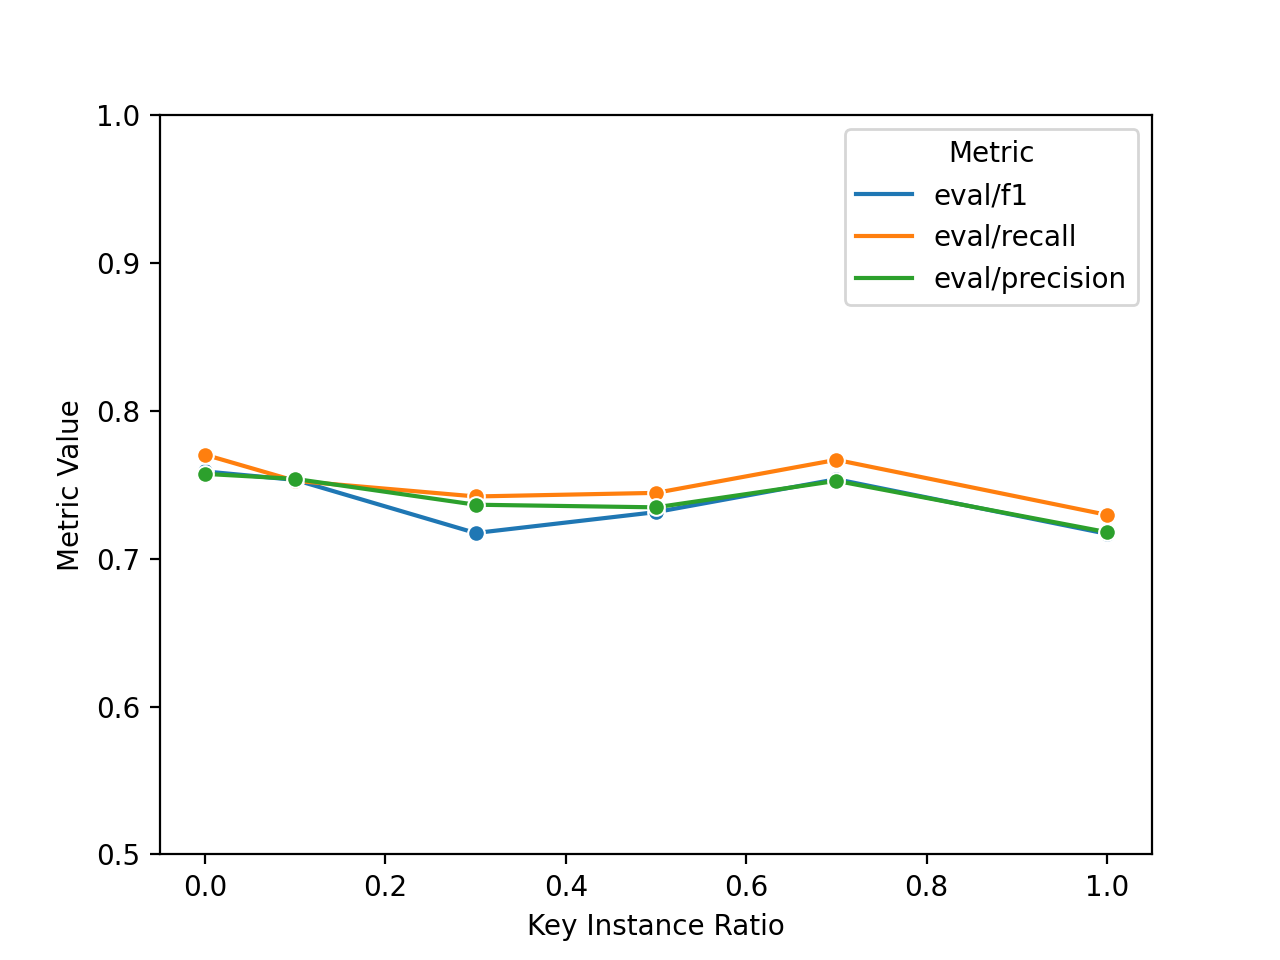

Text(0, 0.5, 'Metric Value')

In [41]:
d = pd.melt(
    runs_df, 
    id_vars=["key_instance_ratio"], 
    value_vars=["eval/f1", "eval/recall", "eval/precision"],
    var_name="Metric",
    value_name="Value"
)

g = sns.lineplot(d, x="key_instance_ratio", y="Value", hue="Metric", marker="o")
g.set(ylim=(0.5, 1))
g.set_xlabel("Key Instance Ratio")
g.set_ylabel("Metric Value")
